In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
root = os.getcwd()
root 

'./fair_taucc'

In [3]:
dataset = "movielens-1m"
sensitive = "gender"
alpha = 1.0

In [4]:
df = pd.read_csv(root + f"/results/{dataset}/{sensitive}/taucc_fair/init_random/aggregated.csv")
df = df[df["fair_major"] == alpha]
df

,fair_major,fair_minor,tau_x_mean,tau_y_mean,NMI_true_labels_mean,AMI_true_labels_mean,ARI_true_labels_mean,NMI_rows_mean,AMI_rows_mean,ARI_rows_mean,...,NMI_rows_var,AMI_rows_var,ARI_rows_var,NMI_cols_var,AMI_cols_var,ARI_cols_var,balance_chierichetti_var,balance_bera_var,KL_fairness_error_var,time_var
110,1.0,0.0,0.111630,0.110607,0.116889,0.114917,0.102512,0.677707,0.677661,0.733491,...,0.024470,0.024481,0.034612,0.024940,0.024957,0.030029,4.931726e-04,0.002113,4.404785e-05,2418.112476
111,1.0,0.1,0.106110,0.105168,0.126499,0.124440,0.108950,0.638921,0.638867,0.686942,...,0.020141,0.020151,0.034580,0.018500,0.018514,0.021217,4.016613e-03,0.020524,9.459046e-04,1637.982667
112,1.0,0.2,0.101809,0.099417,0.121240,0.118905,0.095307,0.560552,0.560480,0.593565,...,0.032511,0.032526,0.052039,0.027189,0.027209,0.032304,1.924494e-03,0.008817,1.541756e-04,1033.204918
113,1.0,0.3,0.110575,0.111940,0.122319,0.120495,0.110735,0.713102,0.713065,0.777796,...,0.007065,0.007068,0.010695,0.006142,0.006147,0.006894,6.255552e-04,0.002862,2.512370e-04,3227.662039
114,1.0,0.4,0.108991,0.107981,0.115088,0.113116,0.099038,0.652160,0.652109,0.706476,...,0.026274,0.026286,0.040755,0.026612,0.026631,0.031590,1.324141e-03,0.006221,1.756902e-04,775.718988
115,1.0,0.5,0.110396,0.109000,0.112919,0.110931,0.098209,0.674994,0.674948,0.735967,...,0.017462,0.017470,0.025157,0.019590,0.019604,0.021299,2.690543e-04,0.001120,1.378539e-05,1379.062302
116,1.0,0.6,0.098336,0.099441,0.118727,0.116613,0.105999,0.567669,0.567600,0.621907,...,0.050733,0.050755,0.062144,0.026566,0.026581,0.022667,1.940769e-03,0.008809,6.751974e-04,34146.235952
117,1.0,0.7,0.106991,0.105056,0.112522,0.110521,0.100468,0.683600,0.683557,0.752718,...,0.004841,0.004844,0.007199,0.006403,0.006409,0.004845,4.588145e-04,0.001939,2.928952e-05,3806.363392
118,1.0,0.8,0.090258,0.102550,0.118275,0.116199,0.100320,0.542959,0.542873,0.563583,...,0.036987,0.037010,0.063429,0.031118,0.031140,0.036986,1.497374e-04,0.002818,1.324896e-04,17904.026055
119,1.0,0.9,0.066038,0.087720,0.110980,0.108496,0.089863,0.380173,0.380024,0.361879,...,0.032562,0.032585,0.057353,0.030905,0.030928,0.034361,3.081778e-07,0.006355,3.029491e-04,32644.274811


In [5]:
df_vanilla = pd.read_csv(root + f"/results/{dataset}/{sensitive}/taucc_vanilla/init_random/results_aggregated.csv")
df_vanilla

,tau_x_mean,tau_x_std,tau_x_var,tau_y_mean,tau_y_std,tau_y_var,NMI_mean,NMI_std,NMI_var,AMI_mean,...,balance_chierichetti_var,balance_bera_mean,balance_bera_std,balance_bera_var,KL_fairness_error_mean,KL_fairness_error_std,KL_fairness_error_var,time_mean,time_std,time_var
0,0.113785,0.008894,0.000079,0.110683,0.012225,0.000149,0.115085,0.011243,0.000126,0.112922,...,0.000584,0.786248,0.053321,0.002843,0.019257,0.009754,0.000095,3.617867,1.277285,1.631457


In [6]:
values = np.unique(df["fair_major"])
values

array([1.])

In [7]:
def create_path(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [8]:
plot_path = root + f"/plots/paper"
#create_path(plot_path)
plot_path

'./fair_taucc/plots/paper'

## Plot of Results (only balance, ARI e taus)

In [9]:
x = np.array(df["fair_minor"].values)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

Balance

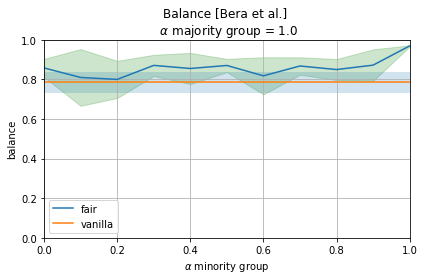

In [10]:
# Vanilla TauCC
vanilla_bera_mean = np.full(len(x), df_vanilla["balance_bera_mean"].values[0])
vanilla_bera_std = np.full(len(x), df_vanilla["balance_bera_std"].values[0])

# Fair TauCC
balance_bera_mean = np.array(df["balance_bera_mean"].values)
balance_bera_std = np.array(df["balance_bera_std"].values)

plt.plot(x, balance_bera_mean, label='fair')
plt.fill_between(x, balance_bera_mean - balance_bera_std, balance_bera_mean + balance_bera_std, alpha=0.2, color='g')
plt.plot(x, vanilla_bera_mean, label='vanilla')
plt.fill_between(x, vanilla_bera_mean - vanilla_bera_std, vanilla_bera_mean + vanilla_bera_std, alpha=0.2)
plt.ylim(0.0, 1.0)
plt.xlim(0.0, 1.0)
plt.legend()
plt.xlabel('$\\alpha$ minority group')
plt.ylabel('balance')
plt.title(f'Balance [Bera et al.] \n $\\alpha$ majority group = {alpha}')
plt.grid(True)
plt.tight_layout()
#plt.show()
plt.savefig(plot_path + f"/{dataset}_fairness.png", dpi=300)

ARI w.r.t. true labels

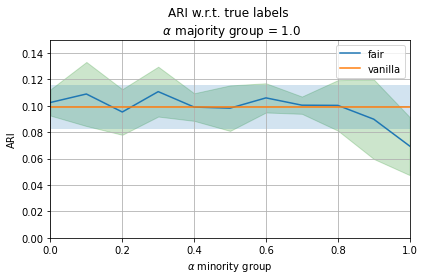

In [16]:
vanilla_ARI_mean = np.full(len(x), df_vanilla["ARI_mean"].values[0])
vanilla_ARI_std = np.full(len(x), df_vanilla["ARI_std"].values[0])

ARI_mean = np.array(df["ARI_true_labels_mean"].values)
ARI_std = np.array(df["ARI_true_labels_std"].values)

plt.plot(x, ARI_mean, label='fair')
plt.fill_between(x, ARI_mean - ARI_std, ARI_mean + ARI_std, alpha=0.2, color='g')
plt.plot(x, vanilla_ARI_mean, label='vanilla')
plt.fill_between(x, vanilla_ARI_mean - vanilla_ARI_std, vanilla_ARI_mean + vanilla_ARI_std, alpha=0.2)
plt.ylim(0.0, 0.15)
plt.xlim(0.0, 1.0)
plt.legend()
plt.xlabel('$\\alpha$ minority group')
plt.ylabel('ARI')
plt.title(f'ARI w.r.t. true labels \n $\\alpha$ majority group = {alpha}')
plt.grid(True)
plt.tight_layout()
#plt.show()
plt.savefig(plot_path + f"/{dataset}_ARI_true.png", dpi=300)

ARI w.r.t. vanilla TauCC

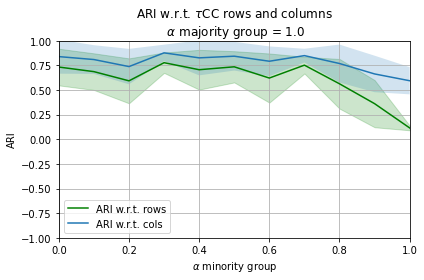

In [12]:
ARIrows_mean = np.array(df["ARI_rows_mean"].values)
ARIrows_std = np.array(df["ARI_rows_std"].values)
ARI_mean = np.array(df["ARI_cols_mean"].values)
ARI_std = np.array(df["ARI_cols_std"].values)

plt.plot(x, ARIrows_mean, label='ARI w.r.t. rows', color="green")
plt.fill_between(x, ARIrows_mean - ARIrows_std, ARIrows_mean + ARIrows_std, alpha=0.2, color="green")
plt.plot(x, ARI_mean, label='ARI w.r.t. cols')
plt.fill_between(x, ARI_mean - ARI_std, ARI_mean + ARI_std, alpha=0.2)
plt.ylim(-1.0, 1.0)
plt.xlim(0.0, 1.0)
plt.legend()
plt.xlabel('$\\alpha$ minority group')
plt.ylabel('ARI')
plt.title(f'ARI w.r.t. $\\tau$CC rows and columns \n $\\alpha$ majority group = {alpha}')
plt.grid(True)
plt.tight_layout()
#plt.show()
plt.savefig(plot_path + f"/{dataset}_ARI.png", dpi=300)

tau x and tau y

In [13]:
vanilla_taux_mean = np.full(len(x), df_vanilla["tau_x_mean"].values[0])
vanilla_taux_std = np.full(len(x), df_vanilla["tau_x_std"].values[0])
vanilla_tauy_mean = np.full(len(x), df_vanilla["tau_y_mean"].values[0])
vanilla_tauy_std = np.full(len(x), df_vanilla["tau_y_std"].values[0])

taux_mean = np.array(df["tau_x_mean"].values)
taux_std = np.array(df["tau_x_std"].values)
tauy_mean = np.array(df["tau_y_mean"].values)
tauy_std = np.array(df["tau_y_std"].values)

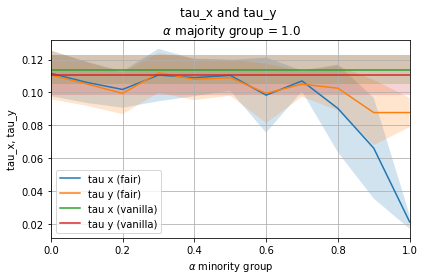

In [14]:
# fair
plt.plot(x, taux_mean, label='tau x (fair)')
plt.fill_between(x, taux_mean - taux_std, taux_mean + taux_std, alpha=0.2)
plt.plot(x, tauy_mean, label='tau y (fair)')
plt.fill_between(x, tauy_mean - tauy_std, tauy_mean + tauy_std, alpha=0.2)

# vanilla
plt.plot(x, vanilla_taux_mean, label='tau x (vanilla)')
plt.fill_between(x, vanilla_taux_mean - vanilla_taux_std, vanilla_taux_mean + vanilla_taux_std, alpha=0.2)
plt.plot(x, vanilla_tauy_mean, label='tau y (vanilla)')
plt.fill_between(x, vanilla_tauy_mean - vanilla_tauy_std, vanilla_tauy_mean + vanilla_tauy_std, alpha=0.2) 

plt.legend()
plt.xlabel('$\\alpha$ minority group')
plt.ylabel('tau_x, tau_y')
plt.title(f'tau_x and tau_y \n $\\alpha$ majority group = {alpha}')

plt.xlim(0.0, 1.0)

plt.grid(True)
plt.tight_layout()
#plt.show()
plt.savefig(plot_path + f"/{dataset}_tau.png", dpi=300)